In [7]:
from IPython.display import Audio

import librosa
import glob
import librosa.display
import numpy as np

import matplotlib.pyplot as plt

In [29]:
#Data Augmentation
# https://medium.com/@keur.plkar/audio-data-augmentation-in-python-a91600613e47
# https://gist.github.com/keyurparalkar/5a49f696ed36ddce6526ab50e29e04ce
# https://pypi.org/project/audiomentations/
# https://www.kaggle.com/CVxTz/audio-data-augmentation
# https://www.kaggle.com/haqishen/augmentation-methods-for-audio
# https://www.tensorflow.org/io/tutorials/audio

In [32]:
DATA_PATH = f'20201126-all-clean-augmented'
NORMAL_AUDIOS = glob.glob(f'./{DATA_PATH}/success/*.wav')
# STUTTERED_AUDIOS = glob.glob(f'./{DATA_PATH}/stuttered/*.wav')
failed_list = []
# print(NORMAL_AUDIOS)
# print(STUTTERED_AUDIOS)

In [34]:
print(len(NORMAL_AUDIOS))
print(len(STUTTERED_AUDIOS))
print(STUTTERED_AUDIOS[2141].split('\\')[1].split('.wav')[0])
print(NORMAL_AUDIOS[100].split('\\')[1].split('.wav')[0])

3492
3420
M_0098_10y6m_1-000132-unk_augmented_0.9_toned
F_0101_13y1m_1-000089-this


In [4]:
class FeatureExtraction:
    def __init__(self, n_mels=128):
        self.n_mels = n_mels
        self.y = None
        self.sr = None
        self.S = None
        self.log_S = None
        self.mfcc = None
        self.delta_mfcc = None
        self.delta2_mfcc = None
        self.M = None
        self.rmse = None
        self.filename = None
    
    def loadFile(self, filename):
        self.filename=filename
        self.y, self.sr = librosa.load(filename)
#         logger.debug('File loaded: %s', filename)
    
    def load_y_sr(self, y, sr):
        self.y = y
        self.sr = sr
    
    def melspectrogram(self):
        self.S = librosa.feature.melspectrogram(self.y, sr=self.sr, n_mels=self.n_mels)
        self.log_S = librosa.amplitude_to_db(self.S)
    
    def plotmelspectrogram(self):
        plt.figure(figsize=(12, 4))
        librosa.display.specshow(self.log_S, sr=self.sr, x_axis='time', y_axis='mel')
        plt.title(f'mel Power Spectrogram ({self.filename})')
        plt.colorbar(format='%+02.0f dB')
        plt.tight_layout()
    
    def extractmfcc(self, n_mfcc=13):
        self.mfcc = librosa.feature.mfcc(S=self.log_S, n_mfcc=n_mfcc)
        self.delta_mfcc = librosa.feature.delta(self.mfcc,mode='nearest')
        self.delta2_mfcc = librosa.feature.delta(self.mfcc, order=2,mode='nearest')
        self.M = np.vstack([self.mfcc, self.delta_mfcc, self.delta2_mfcc])
    
    def plotmfcc(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(3, 1, 1)
        librosa.display.specshow(self.mfcc)
        plt.title(f'mel Power Spectrogram ({self.filename})')
        plt.ylabel('MFCC')
        plt.colorbar()
        
        plt.subplot(3, 1, 2)
        librosa.display.specshow(self.delta_mfcc)
        plt.title(f'mel Power Spectrogram ({self.filename})')
        plt.ylabel('MFCC-$\Delta$')
        plt.colorbar()
        
        plt.subplot(3, 1, 3)
        librosa.display.specshow(self.delta2_mfcc, sr=self.sr, x_axis='time')
        plt.title(f'mel Power Spectrogram ({self.filename})')
        plt.ylabel('MFCC-$\Delta^2$')
        plt.colorbar()
        
        plt.tight_layout()
    
    def extractrmse(self):
        self.rmse = librosa.feature.rmse(y=self.y)

In [5]:
mfcc_objects = []

In [10]:
mfcc_object = FeatureExtraction()
mfcc_object.loadFile(f'F_0101_10y4m_1-000015-um/F_0101_10y4m_1-000015-um.wav')

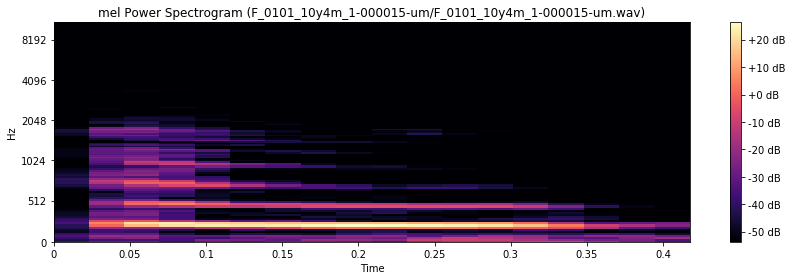

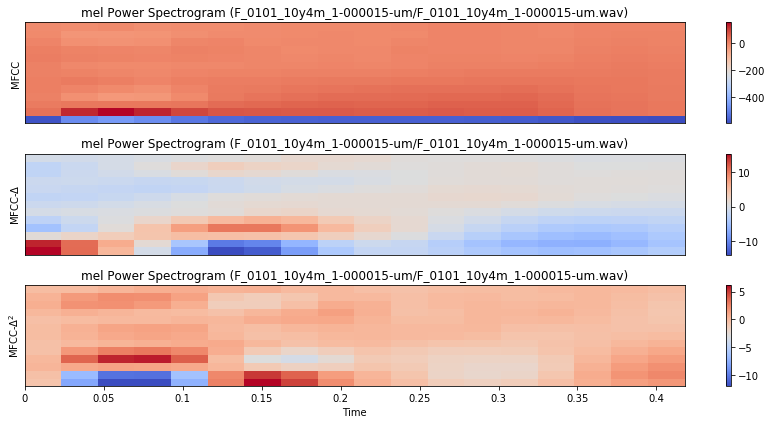

In [11]:
mfcc_object.melspectrogram()
mfcc_object.plotmelspectrogram()
mfcc_object.extractmfcc()
mfcc_object.plotmfcc()

In [6]:
for audio in STUTTERED_AUDIOS:
    mfcc_object = FeatureExtraction()
    mfcc_object.loadFile(f'{audio}')
    mfcc_objects.append(mfcc_object)

NameError: name 'STUTTERED_AUDIOS' is not defined

In [3]:
limit = 5
counter = 0
for mfcc_object in mfcc_objects:
      if counter == 10:
        break
    mfcc_object.melspectrogram()
    mfcc_object.plotmelspectrogram()
    mfcc_object.extractmfcc()
    mfcc_object.plotmfcc()
    Audio(mfcc_object.filename)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)